In [377]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

##### Regression Models 

**Variables/Columns**

- `Age` - years
- `5K etc. Duration` - seconds
- `Height` - inches
- `M/F` - Male or Female


### Read the csv file into a pandas DataFrame

In [378]:
boston = pd.read_csv('marathon/Boston_Marathon_2015_to_2017.csv')
#boston.head()
#boston.shape
boston.columns

Index(['Year', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division', 'Temp (F)'],
      dtype='object')

### Use Pandas get_dummies to convert categorical data

In [379]:
# convert male/female to 0/1s

boston_mf=pd.get_dummies(boston['M/F'])

# join the two dataframes

boston_join=pd.concat([boston, boston_mf], axis=1) 

boston_join.head()

,Year,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Temp (F),F,M
0,2015,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,2:02:39,0:04:56,-,2:09:17,1,1,1,46,0,1
1,2015,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,2:02:42,0:04:58,-,2:09:48,2,2,2,46,0,1
2,2015,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,2:03:01,0:04:59,-,2:10:22,3,3,3,46,0,1
3,2015,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,2:03:47,0:05:00,-,2:10:47,4,4,4,46,0,1
4,2015,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,2:03:27,0:05:00,-,2:10:49,5,5,5,46,0,1


In [380]:
# Convert HH:MM:SS to total seconds

def time_convert(x):
    if x == "-":
        return None
    else:
        times = x.split(':')
        return (60*int(times[0])+60*int(times[1]))+int(times[2])


boston_join['5K Duration'] = boston_join['5K'].apply(time_convert)
boston_join['10K Duration'] = boston_join['10K'].apply(time_convert)
boston_join['15K Duration'] = boston_join['15K'].apply(time_convert)
boston_join['20K Duration'] = boston_join['20K'].apply(time_convert)
boston_join['Half Duration'] = boston_join['Half'].apply(time_convert)
boston_join['25K Duration'] = boston_join['25K'].apply(time_convert)
boston_join['30K Duration'] = boston_join['30K'].apply(time_convert)
boston_join['35K Duration'] = boston_join['35K'].apply(time_convert)
boston_join['40K Duration'] = boston_join['40K'].apply(time_convert)
boston_join['Official Time Duration'] = boston_join['Official Time'].apply(time_convert)

# Drop rows with null values

boston_join.dropna(inplace=True,subset=['Bib','Age','5K Duration','10K Duration','15K Duration','20K Duration', 'Half Duration', '25K Duration','30K Duration','35K Duration','40K Duration','Official Time Duration', 'Temp (F)'])

boston_clean=boston_join[['Bib','Age','5K Duration','10K Duration','15K Duration','20K Duration', 'Half Duration', '25K Duration','30K Duration','35K Duration','40K Duration','Official Time Duration', 'Temp (F)', 'F', 'M']]

boston_clean.head(10)

,Bib,Age,5K Duration,10K Duration,15K Duration,20K Duration,Half Duration,25K Duration,30K Duration,35K Duration,40K Duration,Official Time Duration,Temp (F),F,M
0,3,25,883,1783,2697,89,302,1027,1980,2939,279,677,46,0,1
1,4,30,883,1783,2698,88,301,1027,1979,2939,282,708,46,0,1
2,8,29,883,1783,2697,89,302,1027,1980,2939,301,742,46,0,1
3,11,28,883,1784,2701,89,302,1027,1980,2943,347,767,46,0,1
4,10,32,883,1784,2698,88,301,1027,1980,2939,327,769,46,0,1
5,9,30,884,1785,2699,89,302,1027,1980,2939,318,772,46,0,1
6,14,32,885,1785,2720,103,303,1025,1979,2946,365,800,46,0,1
7,1,39,884,1784,2699,90,302,1027,1979,2939,418,882,46,0,1
8,5,27,883,1783,2698,88,302,1027,1980,2940,399,935,46,0,1
9,16,33,914,1834,2765,163,367,1098,2051,3043,496,952,46,0,1


### Assign X (data) and y (target)
Make sure the data is in the appropriate shape

In [381]:
### set up data for modeling
X_5K = boston_clean[['Bib','Age','Official Time Duration', 'F', 'M']]
y_5K = boston_clean['5K Duration'].values.reshape(-1, 1)
print(X_5K.shape, y_5K.shape)

(79038, 5) (79038, 1)


### Split the data into training and testing

In [382]:
from sklearn.model_selection import train_test_split

X_train_5K, X_test_5K, y_train_5K, y_test_5K = train_test_split(X_5K, y_5K, random_state=29)

X_train_5K.head()

,Bib,Age,Official Time Duration,F,M
66445,30824,49,3386,0,1
56920,12298,26,1236,1,0
36463,20672,52,2473,1,0
57842,7090,51,1501,0,1
30644,4640,40,1233,0,1


### Create a `StandardScaler` model and fit it to the training data

In [383]:
# from sklearn.preprocessing import StandardScaler


# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

### Transform the training and testing data using the your `StandardScaler` models created above

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

### Create a LinearRegression model and fit it to the training data

In [384]:
from sklearn.linear_model import LinearRegression
model_5K = LinearRegression()
model_5K.fit(X_train_5K, y_train_5K)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Make predictions using the test data

In [385]:
predictions_5K = model_5K.predict(X_test_5K)

In [386]:
# Predictions is a list of predicted values
print(predictions_5K)

[[1530.07245074]
 [1695.07668965]
 [1822.87503807]
 ...
 [1494.81238264]
 [1795.18380798]
 [1601.64079225]]


### Plot the residual plot for the predictions on the scaled training and test data 

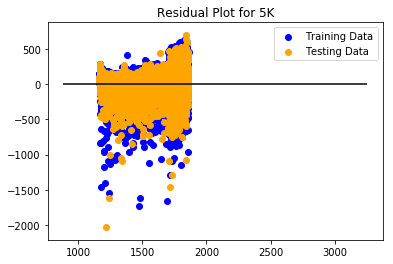

In [387]:
plt.scatter(model.predict(X_train_5K), model.predict(X_train_5K) - y_train_5K, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_5K), model.predict(X_test_5K) - y_test_5K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_5K.min(), xmax=y_test_5K.max())
plt.title("Residual Plot for 5K")
plt.show()

### Calculate MSE and $R^2$ for the model

In [388]:
# Used X_test_5K, y_test_5K, and model.predict(X_test_5K) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_5K, predictions_5K)
r2 = model.score(X_test_5K, y_test_5K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 14540.283790783578, R2: 0.732926653179319


In [389]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_5K, 'model_5K.pk1')

['model_5K.pk1']

In [390]:
# # To save the model without the training data, in order to make predictions without re-training the model
# # Source: https://www.geeksforgeeks.org/saving-a-machine-learning-model/

# import pickle
# from sklearn.externals import joblib 
  
# # Save the model as a pickle in a file 
# joblib.dump(model_5K, 'model_5K.pkl') 
  
# # Load the model from the file 
# model_5K_from_joblib = joblib.load('model_5K.pkl')  
  
# # Use the loaded model to make predictions 
# model_5K_from_joblib.predict(X_test_5K) 

### LASSO model

performs feature selection by reducing small coefficient values to absolute zero

In [391]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_5K, y_train_5K)

predictions = lasso.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions)
r2 = lasso.score(X_test_5K, y_test_5K)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 14540.333076413786, R2: 0.7380835963027237


### Ridge model

reduces multicollinearity
create plot to show differences in coefficient values
use code from here: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [392]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge_5K = Ridge(alpha=.01).fit(X_train_5K, y_train_5K)

predictions_5K = ridge_5K.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions)
r2 = ridge_5K.score(X_test_5K, y_test_5K)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 14540.333076413786, R2: 0.7380844840704522


### ElasticNet model

In [393]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet_5K = ElasticNet(alpha=.01).fit(X_train_5K, y_train_5K)

predictions_5K = elasticnet_5K.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions)
r2 = elasticnet_5K.score(X_test_5K, y_test_5K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 14540.333076413786, R2: 0.7380834838530501


(79038, 4) (79038, 1)


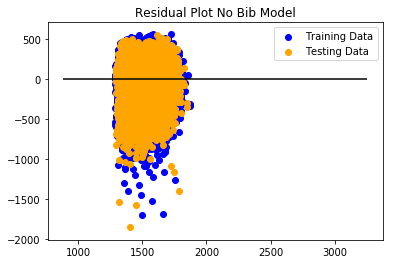

In [394]:
# Re-run the model without the Bib numbers as a feature to test if Bib numbers are helpful

### set up data for modeling
X_nobib = boston_clean[['Age','Official Time Duration', 'F', 'M']]
y_nobib = boston_clean['5K Duration'].values.reshape(-1, 1)
print(X_nobib.shape, y_nobib.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_nobib, X_test_nobib, y_train_nobib, y_test_nobib = train_test_split(X_nobib, y_nobib, random_state=29)
# X_train_nobib.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_nobib = LinearRegression()
model_nobib.fit(X_train_nobib, y_train_nobib)

# Make predictions

predictions_nobib = model_nobib.predict(X_test_nobib)

# Plot the residuals

plt.scatter(model_nobib.predict(X_train_nobib), model_nobib.predict(X_train_nobib) - y_train_nobib, c="blue", label="Training Data")
plt.scatter(model_nobib.predict(X_test_nobib), model_nobib.predict(X_test_nobib) - y_test_nobib, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_nobib.min(), xmax=y_test_nobib.max())
plt.title("Residual Plot No Bib Model")
plt.show()


In [395]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_nobib, predictions)
r2 = model_nobib.score(X_test_nobib, y_test_nobib)


print(f"MSE: {MSE}, R2: {r2}")

# Model built without Bib numbers has a smaller R2 value, so Bib numbers was helping model predictions

MSE: 14540.333076413786, R2: 0.17248974161919128


(79038, 6) (79038, 1)


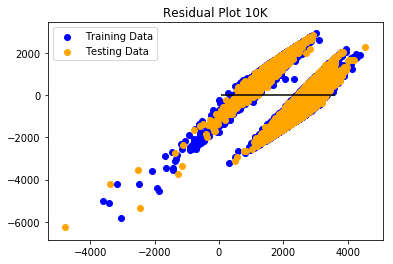

In [396]:
# Re-run the model with the Bib numbers as a feature and for the 5K split times to predict 10K time

### set up data for modeling
X_10K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', '5K Duration']]
y_10K = boston_clean['10K Duration'].values.reshape(-1, 1)
print(X_10K.shape, y_10K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_10K, X_test_10K, y_train_10K, y_test_10K = train_test_split(X_10K, y_10K, random_state=29)
# X_train_5K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_10K = LinearRegression()
model_10K.fit(X_train_10K, y_train_10K)

# Make predictions

predictions_10K = model_10K.predict(X_test_10K)

# Plot the residuals

plt.scatter(model_10K.predict(X_train_10K), model_10K.predict(X_train_10K) - y_train_10K, c="blue", label="Training Data")
plt.scatter(model_10K.predict(X_test_10K), model_10K.predict(X_test_10K) - y_test_10K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_10K.min(), xmax=y_test_10K.max())
plt.title("Residual Plot 10K")
plt.show()

In [397]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_10K, predictions_10K)
r2 = model_10K.score(X_test_10K, y_test_10K)


print(f"MSE: {MSE}, R2: {r2}")

# Model built without Bib numbers has a smaller R2 value

MSE: 567269.0713060743, R2: 0.3255416027793261


In [398]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_10K, 'model_10K.pk1')

['model_10K.pk1']

(79038, 7) (79038, 1)


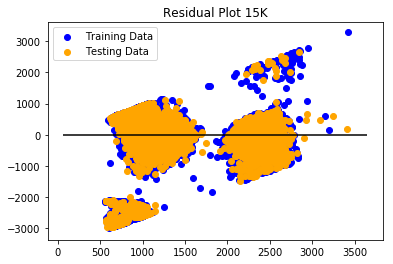

In [399]:
# Re-run the model with the Bib numbers as a feature and for the 5K and 10K split times to predict 15K time

### set up data for modeling
X_15K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', '5K Duration', '10K Duration']]
y_15K = boston_clean['15K Duration'].values.reshape(-1, 1)
print(X_15K.shape, y_15K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_15K, X_test_15K, y_train_15K, y_test_15K = train_test_split(X_15K, y_15K, random_state=29)
# X_train_15K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_15K = LinearRegression()
model_15K.fit(X_train_15K, y_train_15K)

# Make predictions

predictions_15K = model_15K.predict(X_test_15K)

# Plot the residuals

plt.scatter(model_15K.predict(X_train_15K), model_15K.predict(X_train_15K) - y_train_15K, c="blue", label="Training Data")
plt.scatter(model_15K.predict(X_test_15K), model_15K.predict(X_test_15K) - y_test_15K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_15K.min(), xmax=y_test_15K.max())
plt.title("Residual Plot 15K")
plt.show()

In [400]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_15K, predictions_15K)
r2 = model_15K.score(X_test_15K, y_test_15K)


print(f"MSE: {MSE}, R2: {r2}")

# Model built without Bib numbers has a smaller R2 value

MSE: 452848.5428572952, R2: 0.33841374763138976


In [401]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_15K, 'model_15K.pk1')

['model_15K.pk1']

(79038, 8) (79038, 1)


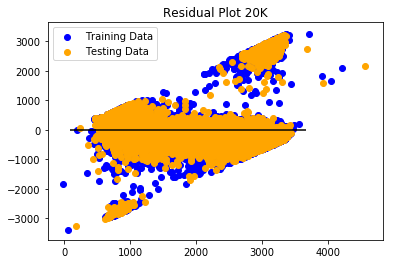

In [402]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K and 15K split times to predict 20K time

### set up data for modeling
X_20K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', '5K Duration', '10K Duration', '15K Duration']]
y_20K = boston_clean['20K Duration'].values.reshape(-1, 1)
print(X_20K.shape, y_20K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_20K, X_test_20K, y_train_20K, y_test_20K = train_test_split(X_20K, y_20K, random_state=29)
# X_train_20K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_20K = LinearRegression()
model_20K.fit(X_train_20K, y_train_20K)

# Make predictions

predictions_20K = model_20K.predict(X_test_20K)

# Plot the residuals

plt.scatter(model_20K.predict(X_train_20K), model_20K.predict(X_train_20K) - y_train_20K, c="blue", label="Training Data")
plt.scatter(model_20K.predict(X_test_20K), model_20K.predict(X_test_20K) - y_test_20K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_20K.min(), xmax=y_test_20K.max())
plt.title("Residual Plot 20K")
plt.show()

In [403]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_20K, predictions_20K)
r2 = model_20K.score(X_test_20K, y_test_20K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 279680.93462995003, R2: 0.6014243714921839


In [404]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_20K, 'model_20K.pk1')

['model_20K.pk1']

(79038, 9) (79038, 1)


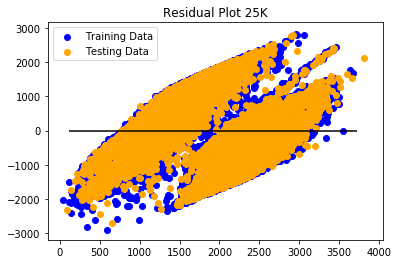

In [405]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K and 20K split times to predict 25K time

### set up data for modeling
X_25K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', '5K Duration', '10K Duration', '15K Duration', '20K Duration']]
y_25K = boston_clean['25K Duration'].values.reshape(-1, 1)
print(X_25K.shape, y_25K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_25K, X_test_25K, y_train_25K, y_test_25K = train_test_split(X_25K, y_25K, random_state=29)
# X_train_25K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_25K = LinearRegression()
model_25K.fit(X_train_25K, y_train_25K)

# Make predictions

predictions_25K = model_25K.predict(X_test_25K)

# Plot the residuals

plt.scatter(model_25K.predict(X_train_25K), model_25K.predict(X_train_25K) - y_train_25K, c="blue", label="Training Data")
plt.scatter(model_25K.predict(X_test_25K), model_25K.predict(X_test_25K) - y_test_25K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_25K.min(), xmax=y_test_25K.max())
plt.title("Residual Plot 25K")
plt.show()

In [406]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_25K, predictions_25K)
r2 = model_25K.score(X_test_25K, y_test_25K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 832226.7620825437, R2: 0.3512000784154765


In [407]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_25K, 'model_25K.pk1')

['model_25K.pk1']

(79038, 10) (79038, 1)


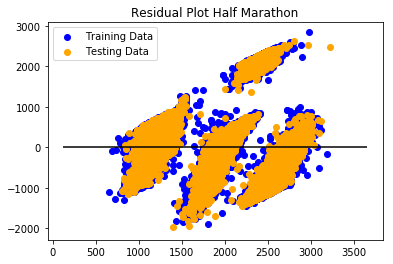

In [408]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K 20K and 25K split times to predict Half time

### set up data for modeling
X_Half = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', '5K Duration', '10K Duration', '15K Duration', '20K Duration', '25K Duration']]
y_Half = boston_clean['Half Duration'].values.reshape(-1, 1)
print(X_Half.shape, y_Half.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_Half, X_test_Half, y_train_Half, y_test_Half = train_test_split(X_Half, y_Half, random_state=29)
# X_train_Half.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_Half = LinearRegression()
model_Half.fit(X_train_Half, y_train_Half)

# Make predictions

predictions_Half = model_Half.predict(X_test_Half)

# Plot the residuals

plt.scatter(model_Half.predict(X_train_Half), model_Half.predict(X_train_Half) - y_train_Half, c="blue", label="Training Data")
plt.scatter(model_Half.predict(X_test_Half), model_Half.predict(X_test_Half) - y_test_Half, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_Half.min(), xmax=y_test_Half.max())
plt.title("Residual Plot Half Marathon")
plt.show()

In [409]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_Half, predictions_Half)
r2 = model_Half.score(X_test_Half, y_test_Half)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 541110.6021685877, R2: 0.3612099644542225


In [410]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_Half, 'model_Half.pk1')

['model_Half.pk1']